In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [31]:
with open("output_metrics.pickle", "rb") as f:
    answer = pickle.load(f)


In [32]:
answer.keys()

dict_keys([(1, 2), (1, 5), (1, 7), (1, 9), (1, 11), (3, 2), (3, 5), (3, 7), (3, 9), (3, 11), (5, 2), (5, 5), (5, 7), (5, 9), (5, 11), (10, 2), (10, 5), (10, 7), (10, 9), (10, 11), (15, 2), (15, 5), (15, 7), (15, 9), (15, 11)])

In [33]:
contents = answer[(3, 7)][0].split()
contents = {x:i for i, x in enumerate(contents)}
contents

{'str': 0,
 'cluster_metrics': 1,
 'metrics': 2,
 'clusters_sizes': 3,
 'weighted_mase': 4,
 'weighted_mape': 5}

In [34]:
Ns_clusters = np.unique([key[1] for key in answer])
window_sizes = np.unique([key[0] for key in answer])
Ns_clusters, window_sizes

(array([ 2,  5,  7,  9, 11]), array([ 1,  3,  5, 10, 15]))

**Кластеризация** 

Davies–Bouldin Index

In [18]:
# for key, value in answer.items():
#     print(f"{value[contents['cluster_metrics']]['DB']:.3f} - {key}")

In [48]:
a = [[value[contents['cluster_metrics']]["DB"] for key, value in answer.items() if key[0] == W] for W in window_sizes]


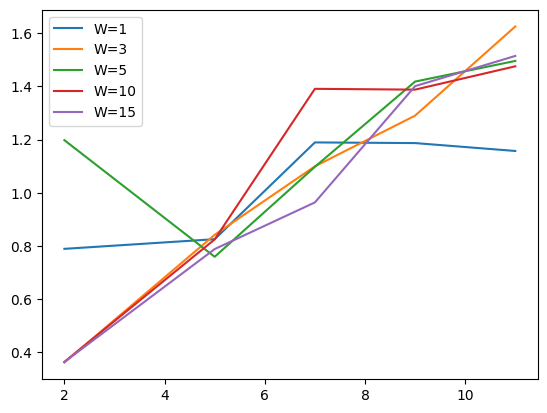

In [49]:
for i in range(len(a)):
    plt.plot(Ns_clusters, a[i], label="W="+str(window_sizes[i]))
plt.title("Davies–Bouldin Index for N_clusters")
plt.xlabel("N_clusters")
plt.ylabel("Davies–Bouldin Index")
plt.legend()
plt.show()

In [52]:
a = [[value[contents['cluster_metrics']]["DB"] for key, value in answer.items() if key[1] == C] for C in Ns_clusters]


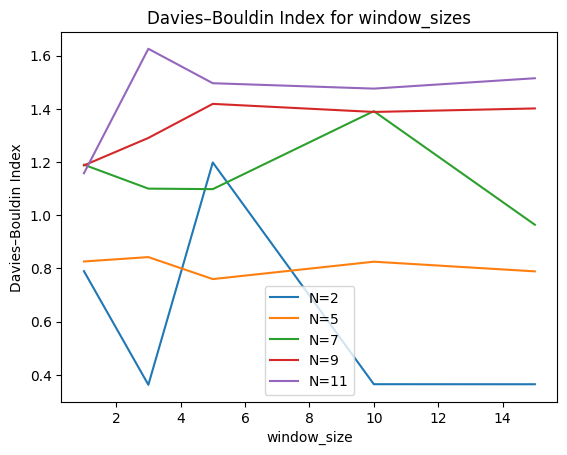

In [54]:
for i in range(len(a)):
    plt.plot(window_sizes, a[i], label="N="+str(Ns_clusters[i]))
plt.legend()
plt.title("Davies–Bouldin Index for window_sizes")
plt.xlabel("window_size")
plt.ylabel("Davies–Bouldin Index")
plt.show()

MAPE

5
[8.64210916e+02 1.11811507e+03 2.77898762e+02 2.93025597e+02
 7.50674178e+02 3.74946247e+02 4.32272655e+01 8.43053854e+02
 7.45746071e-01 1.44562967e+02 3.32938180e+02 3.96351370e+01
 9.76560727e+01 9.49543310e+01 0.00000000e+00 3.21880309e+02
 8.84380813e+00 1.39529604e+02 1.15307249e+00 2.04287972e+01
 4.13939112e+01 2.69622485e+02 4.40483830e+02 1.87059903e+03
 5.60040058e+01 7.97589717e+02 9.16806926e+01 5.58763536e+01
 5.85625910e+01 2.46334640e+02 1.09174266e+00 1.22685348e+02
 4.34292884e+01 3.21873293e+02 4.64383375e+02 1.74470522e+02
 8.52745058e+01 7.22004658e+01 4.81062834e+02 5.34176087e+02
 6.02031294e+02 5.05569541e+00 1.49942284e+02 1.35893128e+01
 6.22775628e+02 2.76151179e+01 5.96885831e+01 5.95467314e+00
 8.77828077e+02 1.12058776e+02 4.98321120e+01 9.77259323e+02
 1.21691022e+02 2.15586396e+02 1.13060139e+02 6.09478472e+01
 8.89408815e+00 3.13072346e+01 1.89624672e+01 1.25338323e+02
 3.13305578e+03 1.19183825e+03 4.01698222e+02 2.11417177e+02
 2.67113219e+02 1.7539

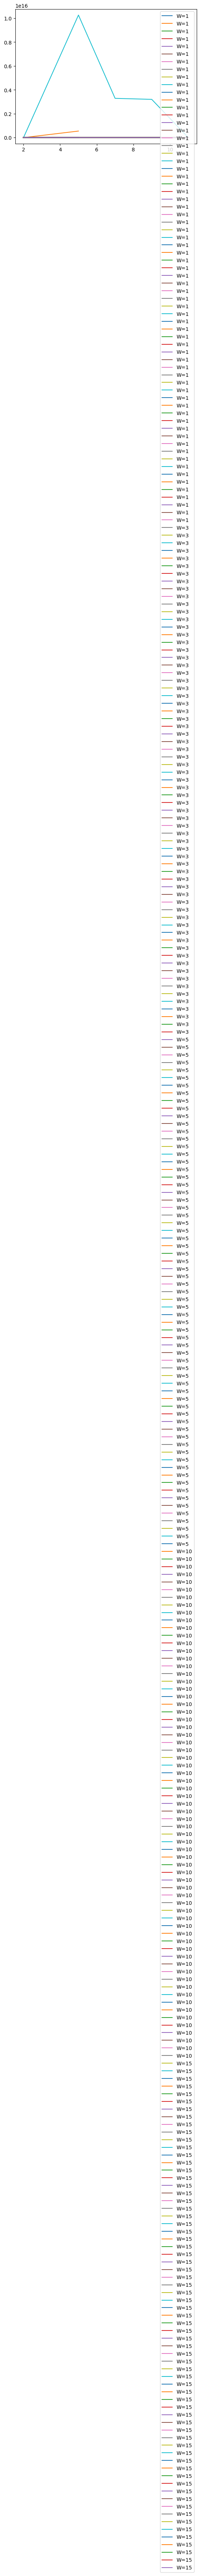

In [39]:
a = [[value[contents['weighted_mape']] for key, value in answer.items() if key[0] == W] for W in window_sizes]
print(len(a[0]))
for i in range(len(window_sizes)):
    print(*a[i])
    plt.plot(Ns_clusters, a[i], label="W="+str(window_sizes[i]))
plt.legend()
plt.show()
